In [35]:
import os
print(f"Current working directory = {os.getcwd()}.")
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"
import seaborn as sns

# You need these three lines only when you want to use TeX to draw figures                                           
os.environ["PATH"] += (os.pathsep + "/usr/local/texlive/2025/bin/universal-darwin")
plt.rcParams["text.usetex"] = True
sns.set_theme(rc={"text.usetex" : True})

import numpy as np
from numpy import exp, sqrt
from Src.NumericalOptionPricing.Contracts import load_contract
from Src.NumericalOptionPricing.VanillaContractPricer import VanillaContractPricer
from Src.NumericalOptionPricing.Utils import get_relative_error, generate_tridiagonal_matrix

Current working directory = /Users/supquant/Desktop/dev/Bilibili_SupQuantCourseResearchTeam/BILIBILI-PUBLIC-NMOP.


### 1. Load Contracts

In [19]:
load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallAnalytical.json")

VanillaContract(contract_type='VanillaCall', s0=50.0, T=0.5, K=40.0, r=0.03, sigma=0.25, algorithm_type='Analytical', control_params=None)

In [20]:
load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallMonteCarlo.json")

VanillaContract(contract_type='VanillaCall', s0=50.0, T=0.5, K=40.0, r=0.03, sigma=0.25, algorithm_type='MonteCarlo', control_params=MonteCarloControlParams(n_sample_paths=100000, use_control_variate=True))

In [21]:
load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallPDE.json")

VanillaContract(contract_type='VanillaCall', s0=50.0, T=0.5, K=40.0, r=0.03, sigma=0.25, algorithm_type='PDE', control_params=PDEControlParams(n_steps_S=100, n_steps_T=100))

### 2. Generate Tridiagonal Matrices

In [22]:
neg = np.array([1, 2, 3, 4])
main = np.array([5, 6, 7, 8])
pos = np.array([9, 10, 11, 12])
generate_tridiagonal_matrix(neg=neg, main=main, pos=pos)

array([[ 1.,  5.,  9.,  0.,  0.,  0.],
       [ 0.,  2.,  6., 10.,  0.,  0.],
       [ 0.,  0.,  3.,  7., 11.,  0.],
       [ 0.,  0.,  0.,  4.,  8., 12.]])

### Pricing Vanilla Call Option

In [23]:
contract_analytical = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallAnalytical.json")
contract_monte_carlo = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallMonteCarlo.json")
contract_pde = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallPDE.json")

pricer = VanillaContractPricer(contract=contract_analytical)
analytical_price = pricer.get_price()
print(f"Analytical price = {analytical_price}.")

pricer.set_contract(contract=contract_monte_carlo)
monte_carlo_price = pricer.get_price()
print(f"Monte Carlo price = {monte_carlo_price}.")
print(f"Monte Carlo price error = {get_relative_error(benchmark=analytical_price, numerical_value=monte_carlo_price)} %.")

pricer.set_contract(contract=contract_pde)
pde_price = pricer.get_price()
print(f"PDE price = {pde_price}.")
print(f"PDE price error = {get_relative_error(benchmark=analytical_price, numerical_value=pde_price)} %.")

Analytical price = 10.917538396999056.
Monte Carlo price = 10.920574954161497.
Monte Carlo price error = 0.0278 %.
PDE price = 10.911481293620863.
PDE price error = 0.0555 %.


### Pricing Vanilla Put Option

In [24]:
contract_analytical = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanPutAnalytical.json")
contract_monte_carlo = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanPutMonteCarlo.json")
contract_pde = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanPutPDE.json")

pricer = VanillaContractPricer(contract=contract_analytical)
analytical_price = pricer.get_price()
print(f"Analytical price = {analytical_price}.")

pricer.set_contract(contract=contract_monte_carlo)
monte_carlo_price = pricer.get_price()
print(f"Monte Carlo price = {monte_carlo_price}.")
print(f"Monte Carlo price error = {get_relative_error(benchmark=analytical_price, numerical_value=monte_carlo_price)} %.")

pricer.set_contract(contract=contract_pde)
pde_price = pricer.get_price()
print(f"PDE price = {pde_price}.")
print(f"PDE price error = {get_relative_error(benchmark=analytical_price, numerical_value=pde_price)} %.")

Analytical price = 0.3220159811215595.
Monte Carlo price = 0.3203087709021854.
Monte Carlo price error = 0.5302 %.
PDE price = 0.3159146284947101.
PDE price error = 1.8947 %.


### Some Thoughts on Control Variate

Take vanilla call options as an example. For $i=1, 2, ..., N$, we have the original sample
$$
    Y_i = (\hat{S}^{(i)}_T-K)^+
$$
and the sample with control variate
$$
    Y_i(\lambda) = (\hat{S}^{(i)}_T-K)^+ - \lambda(\hat{S}^{(i)}_T - S_0e^{rT}),
$$
where $\mathbb{E}\left[\hat{S}^{(i)}_T\right] = S_0e^{rT}$.

The Monte Carlo estimate of option value is
$$
    V_0 \approx \hat{V}_0 = e^{-rT}\frac{1}{N}\sum_{i=1}^{N}Y_i
$$
when $(Y_i)_{i=1}^N$ is used. Or
$$
    V_0 \approx \hat{V}_0 = e^{-rT}\frac{1}{N}\sum_{i=1}^{N}Y_i(\lambda)
$$
when $(Y_i(\lambda))_{i=1}^N$ is used.

In [25]:
contract_call = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallMonteCarlo.json")
s0 = contract_call.s0
K = contract_call.K
T = contract_call.T
r = contract_call.r
sigma =  contract_call.sigma

corr (call) = 0.9880084764307632.
corr (put) = -0.46538115442669237.
estimated optimal lambda (call) = 0.9240718645527863.
estimated optimal lambda (put) = -0.07592813544721363.


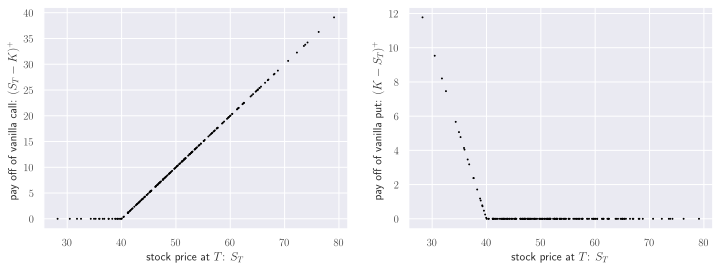

In [26]:
payoffs_call = []
payoffs_put = []
stock_prices = []
np.random.seed(123)
for i in range(200):
    sT = s0 * exp((r - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * np.random.randn())
    payoffs_call.append(max(sT - K, 0))
    payoffs_put.append(max(K - sT, 0))
    stock_prices.append(sT)
print(f"corr (call) = {np.corrcoef(stock_prices, payoffs_call)[0, 1]}.")
print(f"corr (put) = {np.corrcoef(stock_prices, payoffs_put)[0, 1]}.")
print(f"estimated optimal lambda (call) = {np.corrcoef(stock_prices, payoffs_call)[0, 1] * np.std(payoffs_call) / np.std(stock_prices)}.")
print(f"estimated optimal lambda (put) = {np.corrcoef(stock_prices, payoffs_put)[0, 1] * np.std(payoffs_put) / np.std(stock_prices)}.")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].scatter(stock_prices, payoffs_call, s=1, color="black")
ax[0].set_xlabel("stock price at $T$: $S_T$")
ax[0].set_ylabel("pay off of vanilla call: $(S_T-K)^+$")
ax[1].scatter(stock_prices, payoffs_put, s=1, color="black")
ax[1].set_xlabel("stock price at $T$: $S_T$")
ax[1].set_ylabel("pay off of vanilla put: $(K-S_T)^+$")
plt.show()

In [27]:
1 - 0.46538115442669**2

0.7834203811044813

In [28]:
contract_analytical = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallAnalytical.json")
pricer = VanillaContractPricer(contract=contract_analytical)
analytical_price = pricer.get_price()
print(f"Analytical price = {analytical_price}.")

Analytical price = 10.917538396999056.


In [29]:
prices_no_control_variate = []
for i in range(1, 201):
    contract_monte_carlo = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallMonteCarlo.json")
    contract_monte_carlo.control_params.use_control_variate = False
    contract_monte_carlo.control_params.n_sample_paths = i * 10 
    pricer.set_contract(contract_monte_carlo)
    prices_no_control_variate.append(pricer.get_price())

prices_with_control_variate = []
for i in range(1, 201):
    contract_monte_carlo = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanCallMonteCarlo.json")
    contract_monte_carlo.control_params.use_control_variate = True
    contract_monte_carlo.control_params.n_sample_paths = i * 10 
    pricer.set_contract(contract_monte_carlo)
    prices_with_control_variate.append(pricer.get_price())

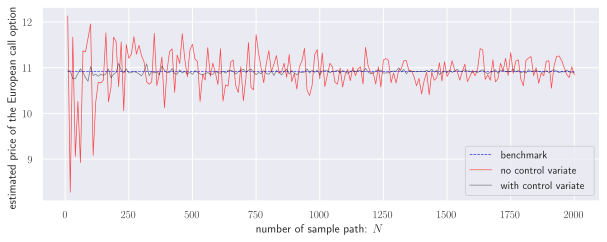

In [30]:
x_axis = np.arange(1, 201, 1) * 10
plt.figure(figsize=(10, 3.5))
plt.plot(x_axis, [analytical_price] * len(x_axis), color="blue", linestyle="--", linewidth=0.7, alpha=0.8, label="benchmark")
plt.plot(x_axis, prices_no_control_variate, color="red", linewidth=0.7, alpha=0.7, label="no control variate")
plt.plot(x_axis, prices_with_control_variate, color="black", linewidth=0.7, alpha=0.5, label="with control variate")
plt.xlabel("number of sample path: $N$")
plt.ylabel("estimated price of the European call option")
plt.legend()
plt.show()

In [31]:
contract_analytical = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanPutAnalytical.json")
pricer = VanillaContractPricer(contract=contract_analytical)
analytical_price = pricer.get_price()
print(f"Analytical price = {analytical_price}.")

Analytical price = 0.3220159811215595.


In [32]:
prices_no_control_variate = []
for i in range(1, 201):
    contract_monte_carlo = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanPutMonteCarlo.json")
    contract_monte_carlo.control_params.use_control_variate = False
    contract_monte_carlo.control_params.n_sample_paths = i * 10 
    pricer.set_contract(contract_monte_carlo)
    prices_no_control_variate.append(pricer.get_price())

prices_with_control_variate = []
for i in range(1, 201):
    contract_monte_carlo = load_contract(json_path="Src/NumericalOptionPricing/Contracts/EuropeanPutMonteCarlo.json")
    contract_monte_carlo.control_params.use_control_variate = True
    contract_monte_carlo.control_params.n_sample_paths = i * 10 
    pricer.set_contract(contract_monte_carlo)
    prices_with_control_variate.append(pricer.get_price())

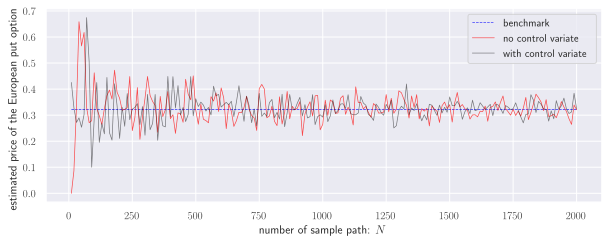

In [33]:
x_axis = np.arange(1, 201, 1) * 10
plt.figure(figsize=(10, 3.5))
plt.plot(x_axis, [analytical_price] * len(x_axis), color="blue", linestyle="--", linewidth=0.7, alpha=0.8, label="benchmark")
plt.plot(x_axis, prices_no_control_variate, color="red", linewidth=0.7, alpha=0.7, label="no control variate")
plt.plot(x_axis, prices_with_control_variate, color="black", linewidth=0.7, alpha=0.5, label="with control variate")
plt.xlabel("number of sample path: $N$")
plt.ylabel("estimated price of the European put option")
plt.legend()
plt.show()